In [1]:
import seapy
# from importlib  import reload
# reload(seapy)
import datetime
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as colors
import scipy.io as sio
import cmaps
from matplotlib.colors import LinearSegmentedColormap
import Obs_workspace as ow
import scipy
import warnings
warnings.filterwarnings('ignore')

NumExpr defaulting to 8 threads.


dat: (426, 421, 521)
[15461.5 15462.5 15463.5 15464.5 15465.5 15466.5 15467.5 15468.5 15469.5
 15470.5 15471.5 15472.5 15473.5 15474.5 15475.5 15476.5 15477.5 15478.5
 15479.5 15480.5 15481.5 15482.5 15483.5 15484.5 15485.5 15486.5 15487.5
 15488.5 15489.5 15490.5 15491.5 15492.5 15493.5 15494.5 15495.5 15496.5
 15497.5 15498.5 15499.5 15500.5 15501.5 15502.5 15503.5 15504.5 15505.5
 15506.5 15507.5 15508.5 15509.5 15510.5 15511.5 15512.5 15513.5 15514.5
 15515.5 15516.5 15517.5 15518.5 15519.5 15520.5 15521.5 15522.5 15523.5
 15524.5 15525.5 15526.5 15527.5 15528.5 15529.5 15530.5 15531.5 15532.5
 15533.5 15534.5 15535.5 15536.5 15537.5 15538.5 15539.5 15540.5 15541.5
 15542.5 15543.5 15544.5 15545.5 15546.5 15547.5 15548.5 15549.5 15550.5
 15551.5 15552.5 15553.5 15554.5 15555.5 15556.5 15557.5 15558.5 15559.5
 15560.5 15561.5 15562.5 15563.5 15564.5 15565.5 15566.5 15567.5 15568.5
 15569.5 15570.5 15571.5 15572.5 15573.5 15574.5 15575.5 15576.5 15577.5
 15578.5 15579.5 15580.5 15581

Output()

OSError: no files specified (file list is empty)

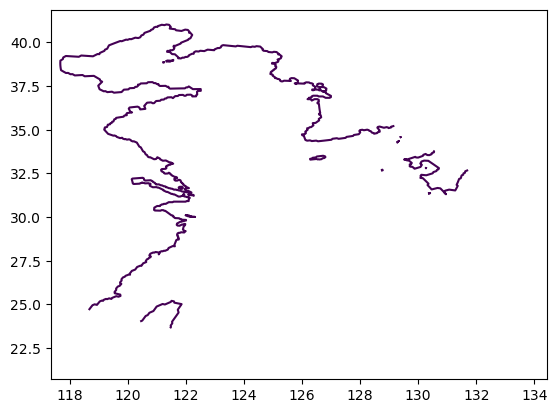

In [4]:
grdfile = '/Volumes/TO_1/outputs_SCORRECTION/ocean_ecs_fwd_15461_outer1.nc'

dt = 1/24
grid = seapy.model.asgrid(grdfile)
reftime = datetime.datetime(1970,1,1)
# ghrsst_gen = seapy.roms.obsgen.geopolar_sst_map(grdfile,dt,reftime=reftime,depth_limit=7.5)
ghrsst_gen = seapy.roms.obsgen.geopolar_sst_map(grdfile,dt,reftime=reftime,depth_limit=7.5,shoredist=60)
obs = ghrsst_gen.convert_file('/Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/NOAA_GHRSST/noaacwBLENDEDsstDaily_2012.nc')
obs.to_netcdf('/Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/INSITU_OBS/geopolar_sst_2012_offshore.nc')



In [4]:
grdfile = '/Volumes/TO_1/outputs_SCORRECTION/ocean_ecs_fwd_15461_outer1.nc'
dt = 1/24/60
grid = seapy.model.asgrid(grdfile)
Datasets = [
            'NSFC2012SPRING-YS',
            'NSFC2012SPRING-ES',
            'IOCAS2012SPRING',
            'NSFC2012AUTUMN-ES',
            'IOCAS2012AUTUMN',
            'NSFC2013SPRING-CJ',
            'IOCAS2013SPRING'
           ]
obss = []
# loading sst obs
sst_obs = seapy.roms.obs.obs(filename='/Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/INSITU_OBS/geopolar_sst_2012_offshore.nc')
sst_obs_org = sst_obs.copy()
for dataset in Datasets:
    print(dataset)
    thisdataset = ow.insitu_workspace('/Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/INSITU_OBS',dataset,dataset)
    thisdataset.pull_ctdinfos()
    # must pull_ctdinfos before pull_alldata
    if dataset =='NSFC2012SPRING-YS':
        thisdataset.pull_alldata(VARS=['PSAL2','potemperature'],refine_withqc_id={'PSAL2':['H03','H16','H25','H34'],'potemperature':[]})
    elif dataset == 'NSFC2012SPRING-ES':
        thisdataset.pull_alldata(VARS=['PSAL2','potemperature'],refine_withqc_id={'PSAL2':[],'potemperature':[]})
    elif dataset == 'IOCAS2012SPRING':
        thisdataset.pull_alldata(VARS=['PSAL2','potemperature'],refine_withqc_id={'PSAL2':['3800-01','3800-02','B-03','DH6-2'],'potemperature':['DH6-2',]})
    elif dataset == 'NSFC2012AUTUMN-ES':
        thisdataset.pull_alldata(VARS=['PSAL2','potemperature'],refine_withqc_id={'PSAL2':[],'potemperature':[]})
    elif dataset == 'IOCAS2012AUTUMN':
        thisdataset.pull_alldata(VARS=['PSAL2','potemperature'],refine_withqc_id={'PSAL2':['3500-09',],'potemperature':['3500-09','DH4-1']})
    elif dataset == 'NSFC2013SPRING-CJ':
        thisdataset.pull_alldata(VARS=['PSAL2','potemperature'],refine_withqc_id={'PSAL2':['A01-03','A01-09','A02-04','A02-08','A03-06','A03-09','A04-07','A06-05','A13-01'],'potemperature':['A04-07',]})
    elif dataset == 'IOCAS2013SPRING':
        thisdataset.pull_alldata(VARS=['PSAL2','potemperature'],refine_withqc_id={'PSAL2':['3600-05','3800-04',],'potemperature':[]})
    thisdata = [seapy.roms.obs.raw_data("TEMP", "CTD", thisdataset.data['potemperature'].value_r,None,0.1),
                seapy.roms.obs.raw_data("SALT", "CTD", thisdataset.data['PSAL2'].value_r,None,0.01),]
    thisinsitu_obs = seapy.roms.obs.gridder_ctd(grid,thisdataset.data['potemperature'].time_r,
                                                thisdataset.data['potemperature'].lon_r,thisdataset.data['potemperature'].lat_r,-thisdataset.data['potemperature'].depth_r, 
                                                thisdata,dt,title="cruise CTD observation %s"%(dataset))
    obss.append(thisinsitu_obs)
    sst_obs.add(thisinsitu_obs)

sst_obs.to_netcdf('/Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/INSITU_OBS/sst_withcruisept_2012_offshore.nc')

dt = 1/24/60
grid = seapy.model.asgrid(grdfile)
# add kodc obs
import datetime
ctd_file = '/Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/INSITU_OBS/KODC_YS.txt'
ctd_id = open(ctd_file)

ctd_id.readline()

line= ctd_id.readlines()

line = [iline.split('\t') for iline in line]

iline = 0
irecord = 1
for crt_line in line:
    if iline == 0:
        kodc_record = [irecord,]
        kodc_line = [float(crt_line[1]),]
        kodc_station = [float(crt_line[2]),]
        kodc_time = (datetime.datetime.strptime(crt_line[3],'%Y-%m-%d %H:%M')-
                     datetime.timedelta(hours=9) - 
                    datetime.datetime(1970,1,1)).total_seconds()/3600/24
        # print('KST:',crt_line[3])
        # print('UTC:',kodc_time,(datetime.timedelta(days=kodc_time)+datetime.datetime(1970,1,1)).strftime('%Y-%m-%d %H:%M',))
        kodc_lat = float(crt_line[4])
        kodc_lon = float(crt_line[5])
        kodc_depth = float(crt_line[7])
        kodc_temp = float(crt_line[8])
        kodc_tqc = float(crt_line[9])
        kodc_salt = float(crt_line[10])
        kodc_sqc = float(crt_line[11])
        
    else:
        if kodc_line[-1] != float(crt_line[1]): irecord+=1
        kodc_record = np.r_[kodc_record,irecord]
        kodc_line = np.r_[kodc_line,float(crt_line[1])]
        kodc_station = np.r_[kodc_station,float(crt_line[2])]
        kodc_time = np.r_[kodc_time, (datetime.datetime.strptime(crt_line[3],'%Y-%m-%d %H:%M')-
                                      datetime.timedelta(hours=9) - 
                                      datetime.datetime(1970,1,1)).total_seconds()/3600/24]
        # print('KST:',crt_line[3])
        # print('UTC:',kodc_time[-1],(datetime.timedelta(days=kodc_time[-1])+datetime.datetime(1970,1,1)).strftime('%Y-%m-%d %H:%M',))
        kodc_lat = np.r_[kodc_lat,float(crt_line[4])]
        kodc_lon = np.r_[kodc_lon,float(crt_line[5])]
        kodc_depth = np.r_[kodc_depth, float(crt_line[7])]
        kodc_temp = np.r_[kodc_temp, float(crt_line[8])]
        kodc_tqc = np.r_[kodc_tqc,float(crt_line[9])]
        kodc_salt = np.r_[kodc_salt, float(crt_line[10])]
        kodc_sqc = np.r_[kodc_sqc,float(crt_line[11])]
        
        
    iline+=1
ctd_id.close()
for iline in [107.,106.,105.,104.,103.,102.,209.,208.,207.]:
    exclude_pos = np.where(kodc_line != iline)
    kodc_record = kodc_record[exclude_pos]
    kodc_station = kodc_station[exclude_pos]
    kodc_time = kodc_time[exclude_pos]
    kodc_lat = kodc_lat[exclude_pos]
    kodc_lon = kodc_lon[exclude_pos]
    kodc_depth = kodc_depth[exclude_pos]
    kodc_temp = kodc_temp[exclude_pos]
    kodc_tqc = kodc_tqc[exclude_pos]
    kodc_salt = kodc_salt[exclude_pos]
    kodc_sqc = kodc_sqc[exclude_pos]
    kodc_line =kodc_line[exclude_pos]

data = [seapy.roms.obs.raw_data("TEMP", "CTD", kodc_temp,None,0.1),
                seapy.roms.obs.raw_data("SALT", "CTD", kodc_salt,None,0.01),]
kodc_obs = seapy.roms.obs.gridder_ctd(grid,kodc_time,
                                                kodc_lon,kodc_lat,-kodc_depth, 
                                                data,dt,title="CTD observation KODC")
#load sst_with cruise
withcruise_obs = seapy.roms.obs.obs(filename='/Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/INSITU_OBS/sst_withcruisept_2012_offshore.nc')
# withcruise_obs = seapy.roms.obs.obs(filename='/Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/NOAA_GHRSST/geopolar_sst_201304nc')
withcruise_obs_org = withcruise_obs.copy()
# merge with sst_with cruise
withcruise_obs.add(kodc_obs)
# super observation
merge_obs = seapy.roms.obs.gridder_s(grid,withcruise_obs,dt) 
merge_obs.to_netcdf('/Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/INSITU_OBS/sst_withcruiseptpkodc_2012_offshore.nc')

NSFC2012SPRING-YS
Workspace: /Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/INSITU_OBS/NSFC2012SPRING-YS
PSAL2
qc specified: 
['H03', 'H16', 'H25', 'H34']
quality control is activate: H03
quality control is activate: H16
quality control is activate: H25
quality control is activate: H34
potemperature


Output()

NSFC2012SPRING-ES
Workspace: /Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/INSITU_OBS/NSFC2012SPRING-ES
PSAL2
potemperature


Output()

IOCAS2012SPRING
Workspace: /Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/INSITU_OBS/IOCAS2012SPRING
PSAL2
qc specified: 
['3800-01', '3800-02', 'B-03', 'DH6-2']
quality control is activate: 3800-01
quality control is activate: 3800-02
quality control is activate: B-03
quality control is activate: DH6-2
potemperature
qc specified: 
['DH6-2']
quality control is activate: DH6-2


Output()

NSFC2012AUTUMN-ES
Workspace: /Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/INSITU_OBS/NSFC2012AUTUMN-ES
PSAL2
potemperature


Output()

IOCAS2012AUTUMN
Workspace: /Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/INSITU_OBS/IOCAS2012AUTUMN
PSAL2
qc specified: 
['3500-09']
quality control is activate: 3500-09
potemperature
qc specified: 
['3500-09', 'DH4-1']
quality control is activate: 3500-09
quality control is activate: DH4-1


Output()

NSFC2013SPRING-CJ
Workspace: /Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/INSITU_OBS/NSFC2013SPRING-CJ
PSAL2
qc specified: 
['A01-03', 'A01-09', 'A02-04', 'A02-08', 'A03-06', 'A03-09', 'A04-07', 'A06-05', 'A13-01']
quality control is activate: A01-03
quality control is activate: A01-09
quality control is activate: A02-04
quality control is activate: A02-08
quality control is activate: A03-06
quality control is activate: A03-09
quality control is activate: A04-07
quality control is activate: A06-05
quality control is activate: A13-01
potemperature
qc specified: 
['A04-07']
quality control is activate: A04-07


Output()

IOCAS2013SPRING
Workspace: /Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/INSITU_OBS/IOCAS2013SPRING
PSAL2
qc specified: 
['3600-05', '3800-04']
quality control is activate: 3600-05
quality control is activate: 3800-04
potemperature


Output()

Output()

OSError: no files specified (file list is empty)